In [107]:
#importing libaries
import pandas as pd

In [108]:
#loading the dataset
file_path = r"C:\Users\Hp 1040 G6\Music\SAGE\3MTT\archive\covid_19_clean_complete.csv"

df = pd.read_csv(r"C:\Users\Hp 1040 G6\Music\SAGE\3MTT\archive\covid_19_clean_complete.csv")

In [30]:
#preview dataset
print(df.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [31]:
#checking for missing values
print(df.isnull().sum())

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [26]:
#standardizing date format
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
#filling missing values
df.fillna(method = 'ffill', inplace = True)
df['Recovered'] = df['Recovered'].fillna(0)

In [34]:
#adding Active cases
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [37]:
#removing duplicates
df.drop_duplicates(inplace = True)

In [50]:
# Calculate daily changes
df['Daily_Confirmed'] = df.groupby(['Country/Region'])['Confirmed'].diff().fillna(0)
df['Daily_Deaths'] = df.groupby(['Country/Region'])['Deaths'].diff().fillna(0)
df['Daily_Recovered'] = df.groupby(['Country/Region'])['Recovered'].diff().fillna(0)

In [51]:
#Aggregating data at the country level
country_data = df.groupby(['Date', 'Country/Region']).sum().reset_index()

In [53]:
# Save cleaned data to CSV for future use
country_data.to_csv("cleaned_covid_data.csv", index=False)

In [55]:
#creating new features
country_data['Growth_Rate'] = country_data['Confirmed'] / country_data['Confirmed'].shift(1).fillna(1)
country_data['Mortality_Rate'] = (country_data['Deaths'] / country_data['Confirmed']).fillna(0)
country_data['Recovery_Rate'] = (country_data['Recovered'] / country_data['Confirmed']).fillna(0)


print(df.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  Daily_Confirmed  \
0       0          0       0  Eastern Mediterranean              0.0   
1       0          0       0                 Europe              0.0   
2       0          0       0                 Africa              0.0   
3       0          0       0                 Europe              0.0   
4       0          0       0                 Africa              0.0   

   Daily_Deaths  Daily_Recovered  
0           0.0              0.0  
1           0.0       

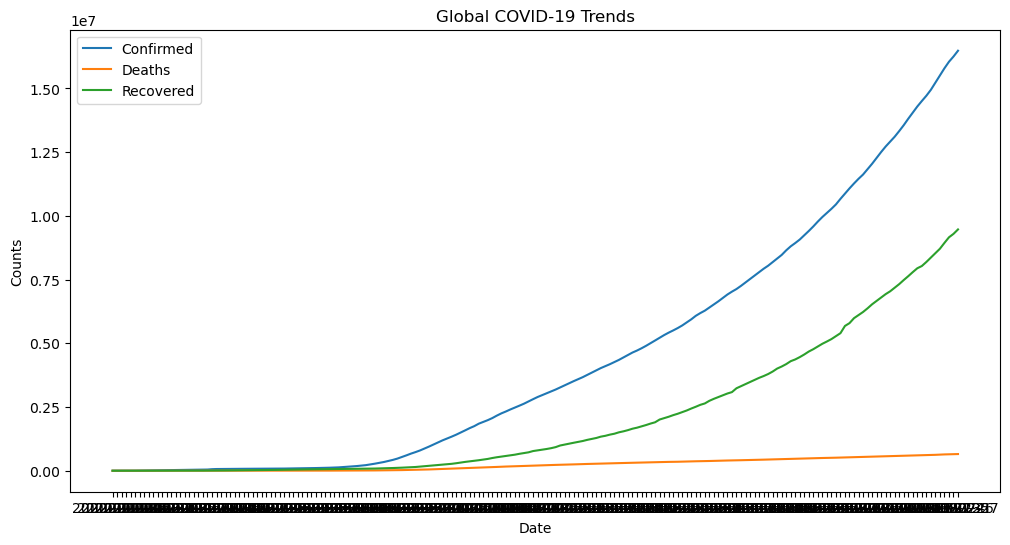

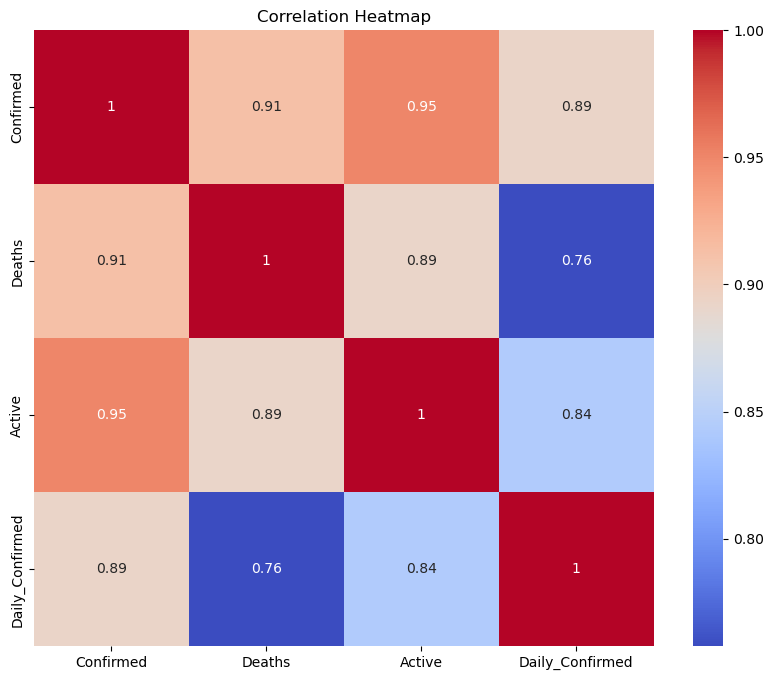

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

#Covid-19 trends over time
global_data = df.groupby('Date').sum()

plt.figure(figsize = (12,6))
plt.plot(global_data.index, global_data['Confirmed'], label = "Confirmed")
plt.plot(global_data.index, global_data['Deaths'], label = "Deaths")
plt.plot(global_data.index, global_data['Recovered'], label = "Recovered")
plt.title("Global COVID-19 Trends")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.legend()
plt.show()

#Coreelation heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(country_data[['Confirmed', 'Deaths', 'Active', 'Daily_Confirmed']].corr(), annot = True, cmap = "coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [161]:
#time series forecasting
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

time_series = global_data['Confirmed']
time_series.index = pd.date_range(start=time_series.index[0], end=time_series.index[-1], freq='D')

result = adfuller(time_series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    time_series = time_series.diff().dropna()

model = ARIMA(time_series, order = (5, 1, 0))
arima_fit = model.fit()
forecast = arima_fit.forecast(steps = 30)

print("30-Day Forecast:")
print(forecast)

ADF Statistic: 2.056470238587934
p-value: 0.9987419829144141
30-Day Forecast:
2020-07-28    252319.969397
2020-07-29    267532.819616
2020-07-30    277456.468172
2020-07-31    269931.835060
2020-08-01    244025.647915
2020-08-02    233572.030209
2020-08-03    238438.113852
2020-08-04    250021.284813
2020-08-05    262964.581520
2020-08-06    268012.260514
2020-08-07    259890.645632
2020-08-08    248512.691649
2020-08-09    242510.648185
2020-08-10    244063.004864
2020-08-11    251524.308773
2020-08-12    259195.236184
2020-08-13    260926.883471
2020-08-14    256617.317555
2020-08-15    250487.941790
2020-08-16    246850.116560
2020-08-17    247895.025985
2020-08-18    252353.920054
2020-08-19    256442.688445
2020-08-20    257310.795424
2020-08-21    254924.008172
2020-08-22    251419.144091
2020-08-23    249405.465698
2020-08-24    250119.899576
2020-08-25    252634.430048
2020-08-26    254884.016842
Freq: D, Name: predicted_mean, dtype: float64


In [167]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Cleaning the Data
country_data['Risk_Level'] = country_data['Mortality_Rate'].apply(lambda x: 1 if x > 0.05 else 0)
X = country_data[['Confirmed', 'Deaths', 'Active', 'Growth_Rate']]  # Feature variables
y = country_data['Risk_Level']  # Target variable

# Checking for Missing Values and Infinite Values
X = X.replace([np.inf, -np.inf], np.nan)  # Fix: Explicitly reassign X to handle the warning
print("Missing values before imputation:")
print(X.isnull().sum())

# Imputing Missing Values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Ensure No Missing Values
print("Missing values after imputation:")
print(X.isnull().sum())


Missing values before imputation:
Confirmed         0
Deaths            0
Active            0
Growth_Rate    8018
dtype: int64
Missing values after imputation:
Confirmed      0
Deaths         0
Active         0
Growth_Rate    0
dtype: int64


In [168]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Model
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5940
           1       1.00      0.98      0.99      1092

    accuracy                           1.00      7032
   macro avg       1.00      0.99      0.99      7032
weighted avg       1.00      1.00      1.00      7032



In [169]:
#exporting the processed dataset
country_data.to_csv("final_covid_data.csv", index=False)